In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
# actions = [
#     'pointing',
#     'click',
#     'click_hold',
#     'grab'
# ]

# data = np.concatenate([
#     np.load('dataset/seq_pointing_1647916981.npy'),
#     np.load('dataset/seq_click_1647916981.npy'),
#     np.load('dataset/seq_click_hold_1647916981.npy'),
#     np.load('dataset/seq_grab_1647916981.npy')
# ], axis=0)


actions = [
    'five', 'pointing', 'grab'
]
data = np.concatenate([
    np.load('dataset/seq_five_1648109564.npy'),
    np.load('dataset/seq_pointing_1648109564.npy'),
    np.load('dataset/seq_grab_1648109564.npy')
], axis=0)

data.shape

(2703, 5, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(2703, 5, 99)
(2703,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(2703, 3)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2432, 5, 99) (2432, 3)
(271, 5, 99) (271, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


2022-03-24 17:17:27.682699: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint('models/model_v9.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
50/76 [==================>...........] - ETA: 0s - loss: 0.9269 - acc: 0.9056
Epoch 1: val_acc improved from -inf to 0.98155, saving model to models/model_v9.h5
76/76 [==============================] - 1s 5ms/step - loss: 0.6477 - acc: 0.9309 - val_loss: 0.1662 - val_acc: 0.9815 - lr: 0.0010
Epoch 2/100
55/76 [====================>.........] - ETA: 0s - loss: 0.0964 - acc: 0.9881   
Epoch 2: val_acc improved from 0.98155 to 0.98524, saving model to models/model_v9.h5
76/76 [==============================] - 0s 2ms/step - loss: 0.0846 - acc: 0.9889 - val_loss: 0.0517 - val_acc: 0.9852 - lr: 0.0010
Epoch 3/100
57/76 [=====================>........] - ETA: 0s - loss: 0.0251 - acc: 0.9951   
Epoch 3: val_acc improved from 0.98524 to 0.99631, saving model to models/model_v9.h5
76/76 [==============================] - 0s 3ms/step - loss: 0.0279 - acc: 0.9942 - val_loss: 0.0126 - val_acc: 0.9963 - lr: 0.0010
Epoch 4/100
55/76 [====================>.........] - ETA: 0s - loss: 0.02

56/76 [=====================>........] - ETA: 0s - loss: 4.7129e-07 - acc: 1.0000
Epoch 30: val_acc did not improve from 1.00000
76/76 [==============================] - 0s 2ms/step - loss: 7.7122e-07 - acc: 1.0000 - val_loss: 0.0107 - val_acc: 0.9963 - lr: 0.0010
Epoch 31/100
54/76 [====================>.........] - ETA: 0s - loss: 6.6448e-07 - acc: 1.0000
Epoch 31: val_acc did not improve from 1.00000
76/76 [==============================] - 0s 2ms/step - loss: 7.1031e-07 - acc: 1.0000 - val_loss: 0.0105 - val_acc: 0.9963 - lr: 0.0010
Epoch 32/100
55/76 [====================>.........] - ETA: 0s - loss: 5.3658e-07 - acc: 1.0000
Epoch 32: val_acc did not improve from 1.00000
76/76 [==============================] - 0s 2ms/step - loss: 6.5528e-07 - acc: 1.0000 - val_loss: 0.0105 - val_acc: 0.9963 - lr: 0.0010
Epoch 33/100
56/76 [=====================>........] - ETA: 0s - loss: 6.5546e-07 - acc: 1.0000
Epoch 33: val_acc did not improve from 1.00000
76/76 [==============================

56/76 [=====================>........] - ETA: 0s - loss: 2.1227e-07 - acc: 1.0000
Epoch 59: val_acc did not improve from 1.00000
76/76 [==============================] - 0s 2ms/step - loss: 2.1714e-07 - acc: 1.0000 - val_loss: 0.0113 - val_acc: 0.9926 - lr: 5.0000e-04
Epoch 60/100
57/76 [=====================>........] - ETA: 0s - loss: 1.9227e-07 - acc: 1.0000
Epoch 60: val_acc did not improve from 1.00000
76/76 [==============================] - 0s 2ms/step - loss: 2.1376e-07 - acc: 1.0000 - val_loss: 0.0117 - val_acc: 0.9926 - lr: 5.0000e-04
Epoch 61/100
57/76 [=====================>........] - ETA: 0s - loss: 2.5822e-07 - acc: 1.0000
Epoch 61: val_acc did not improve from 1.00000
76/76 [==============================] - 0s 2ms/step - loss: 2.1018e-07 - acc: 1.0000 - val_loss: 0.0120 - val_acc: 0.9926 - lr: 5.0000e-04
Epoch 62/100
56/76 [=====================>........] - ETA: 0s - loss: 2.3901e-07 - acc: 1.0000
Epoch 62: val_acc did not improve from 1.00000
76/76 [==================

54/76 [====================>.........] - ETA: 0s - loss: 9.7615e-08 - acc: 1.0000
Epoch 88: val_acc did not improve from 1.00000
76/76 [==============================] - 0s 2ms/step - loss: 1.2386e-07 - acc: 1.0000 - val_loss: 0.0212 - val_acc: 0.9926 - lr: 5.0000e-04
Epoch 89/100
58/76 [=====================>........] - ETA: 0s - loss: 1.2460e-07 - acc: 1.0000
Epoch 89: val_acc did not improve from 1.00000
76/76 [==============================] - 0s 2ms/step - loss: 1.2097e-07 - acc: 1.0000 - val_loss: 0.0214 - val_acc: 0.9926 - lr: 5.0000e-04
Epoch 90/100
55/76 [====================>.........] - ETA: 0s - loss: 1.2964e-07 - acc: 1.0000
Epoch 90: val_acc did not improve from 1.00000
76/76 [==============================] - 0s 2ms/step - loss: 1.1823e-07 - acc: 1.0000 - val_loss: 0.0217 - val_acc: 0.9926 - lr: 5.0000e-04
Epoch 91/100
57/76 [=====================>........] - ETA: 0s - loss: 1.2287e-07 - acc: 1.0000
Epoch 91: val_acc did not improve from 1.00000
76/76 [==================

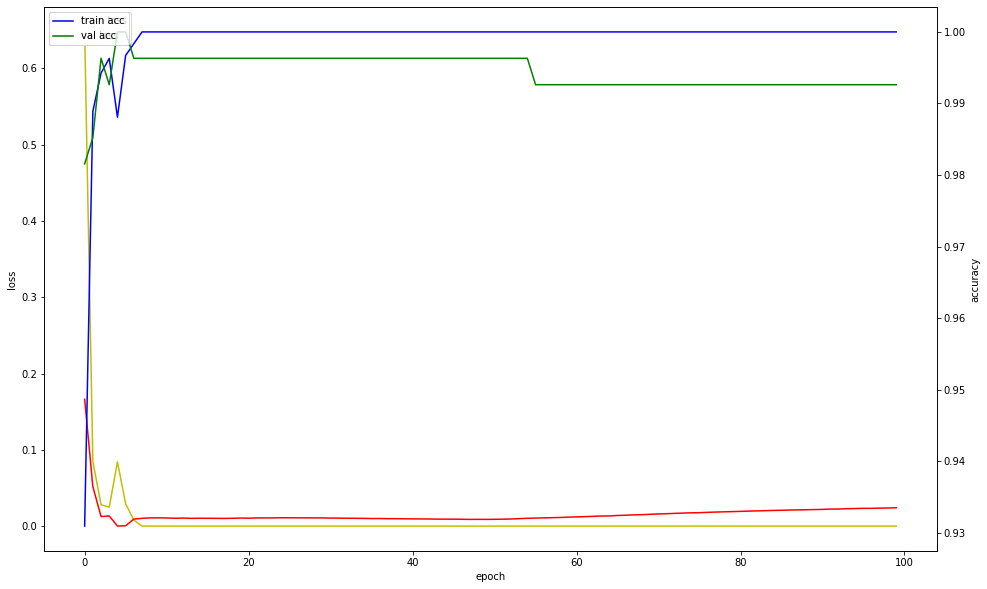

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [9]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[89,  1],
        [ 0, 37]],

       [[78,  0],
        [ 1, 48]],

       [[86,  0],
        [ 0, 41]]])